# **Laboratory 8: Neural networks**

In this laboratory work, neural networks are introduced, and a type of network called a **multilayer perceptron (MLP) will be implemented.**

A neural network is a non-linear computational model inspired by the human brain, designed to recognize patterns and learn from data. In its simplest form, a neural network consists of interconnected "neurons" organized in layers. Each neuron processes inputs to produce an output, which it transmits to the next layer, thus allowing the network to learn complex representations.

The components of a neural network are:

1. **Neuron (Perceptron)**: The fundamental element of a neural network that calculates a linear combination of input features based on weights $w$ and bias $b$:
$$
  z = \sum_{i=1}^{n} w_i x_i + b
$$

2. **Activation Function**: Adds non-linearity, allowing neural networks to learn complex relationships. The most commonly used functions are:


- ReLU (Rectified Linear Unit)
$$ f(z) = max(z, 0)$$

- Sigmoid: This function takes a real number and compresses it into an interval between 0 and 1, so large negative numbers become 0, and large positive numbers become 1. It can also be used in binary classification to transform scores into probabilities.

$$ f(z) = \frac{1}{1 + e^{-z}} $$

<p align="center">
  <img src="imgs/sigmoid.png" alt="image" width="200" title="Neuron"/>
</p> 
<p align="center"><em>Figure 1. The sigmoid function. </em></p>

- Softmax (for multi-class classification): This function is most often used to transform the scores corresponding to the classes into a probability distribution.

$$ f(z_i) = \frac{e^{z_i}}{\sum_{j=1}^{K}e^{z_j}} $$

where K represents the number of classes, and $z_i$ is the score for class $i$

<p align="center">
  <img src="imgs/neuron.png" alt="image" width="300" title="Neuron"/>
</p> 
<p align="center"><em>Figure 2. The mathematical model of a neuron. </em></p>


Neural networks are modeled as groups of neurons connected in an acyclic graph. In other words, the outputs of some neurons can become inputs for other neurons. Neural network models are often organized into layers of neurons. For standard neural networks, the most common type of layer is the **fully connected layer**, in which all neurons between two adjacent layers are connected to each other,
and neurons within a single layer have no connections between them. We define three main types of layers:

- **Input Layer**: Receives the raw data, with each node representing an input feature.
- **Hidden Layers**: Intermediate layers that learn to extract more complex features.
- **Output Layer**: Provides the final prediction, organized differently depending on the task (e.g., one node for binary classification or multiple nodes for multi-class classification).


Below are two examples of neural network topologies that use fully connected layers:

<p align="center">
  <img src="imgs/mlp.png" alt="image" width="600" title="Neuron"/>
</p> 
<p align="center"><em>Figure 3. Left, a network with 2 layers (one hidden layer and one output layer). Right, a network with 3 layers (two hidden layers and one output layer). These networks use fully connected layers, where each neuron is connected to every neuron in the next layer. </em></p>


### Multilayer Perceptrons (MLPs)
A multilayer perceptron (MLP) is a type of neural network consisting of an input layer, one or more hidden layers, and an output layer. Each layer in the MLP is fully connected, meaning that each neuron in one layer is connected to every neuron in the next layer.

#### Using MLPs for Classification

##### **1. General Concepts**
In classification, the goal of the MLP is to divide the data into distinct classes. In the case of binary classification, the output layer will have a single neuron that uses the sigmoid activation function. Thus, the network's output represents the probability of class 1:

$$
p(y = 1 | \mathbf{x}; \boldsymbol{\theta}) = \sigma(a) = \frac{1}{1 + e^{-a}}
$$

where $y$ represents the class, $x$ are the network's input data, $\theta$ are the model's parameters, $\sigma$ represents the sigmoid function, and $a$ represents the **logits**, i.e., the output of the last neuron before applying the sigmoid activation function.

In the case of multi-class classification, the network's output layer will have one neuron per class that uses the softmax activation function.

A multilayer perceptron (MLP) tries to find an optimal non-linear decision surface using the *training* data. Thus, through the training process, the model adjusts its parameters (weights and biases) to learn to correctly separate the training data into the corresponding classes. The goal is to obtain a model that can classify new data from a test set with the highest possible accuracy.


##### **2. Splitting the Dataset**
Splitting the dataset into training, validation, and test subsets is an essential practice in training neural networks.

1. Training Set: The model uses this subset to adjust its parameters (weights and biases) during training. It usually represents the largest part of the data, around 60-70% of the total dataset.

2. Validation Set: This subset is used to evaluate the model's performance during training and to adjust hyperparameters (such as the number of layers, number of neurons, etc.). The validation set does not directly influence the adjustment of the model's parameters but provides feedback to prevent overfitting and to optimize the model. It is usually around 10-20% of the dataset.

3. Test Set: After the model is trained and optimized using the validation set, the test set is used to evaluate the final performance of the model. The purpose of this subset is to provide an estimate of the model's ability to generalize to new and unknown data. It is usually around 10-20% of the dataset.


##### **3. Training the MLP**

To find the optimal parameters (weights and biases) of the model during training, a loss function is defined that measures how well the network's predictions correspond to the actual labels.

Thus, in the case of binary classification, the loss function used is **binary cross-entropy**:
$$
\text{BCELoss} = -\frac{1}{N} \sum_{i=1}^{N} \left( y_i \cdot \log(\hat{y}_i) + (1 - y_i) \cdot \log(1 - \hat{y}_i) \right)
$$

- where N represents the total number of examples
- $y_i$ is the real label (0 or 1)
- $\hat y_i$ is the probability predicted by the model for the positive class (1).

To minimize the loss function, an iterative optimization process such as **gradient descent** is usually used. This algorithm iteratively updates the parameters in the opposite direction of the gradient to ensure the loss function decreases.

The parameter update is performed as follows:

$$
\theta \leftarrow \theta - \alpha \nabla_{\theta} \text{BCELoss}
$$

- where α is the learning rate
- $\nabla_{\theta} \text{BCELoss}$ is the gradient of the loss function with respect to the parameters and contains the partial derivatives of the loss function with respect to each parameter of the model

Gradient descent can be applied in three main ways: **batch gradient descent**, **stochastic gradient descent (SGD)**, and **mini-batch gradient descent**.

1. Batch gradient descent: The gradient is calculated using the entire training set at each update step.
2. Stochastic gradient descent: The gradient is calculated and the parameters are updated for each example in the training set.
3. Mini-Batch Gradient Descent: The dataset is divided into small subsets (mini-batches), and the gradient is calculated and the parameters are updated for each mini-batch.

The steps for training an MLP are:

1. **Forward Pass**: The input data is passed through the network layer by layer, from the input layer to the output layer. Each neuron calculates a linear combination of the inputs (the weighted sum of the inputs plus a bias term), applies an activation function, and passes the output on. This phase produces the network's prediction for a given set of inputs.

2. **Error Calculation** (Loss Function): After the prediction is obtained, it is compared with the actual value (the true label).

3. **Backpropagation**: In this phase, the partial derivatives of the loss function with respect to each parameter of the model are calculated by propagating the derivatives from the output layer to the hidden layers using the chain rule.

6. **Weight Update**: The weights are adjusted in the descending direction of the gradient using the gradient descent method.

##### **4. Testing the MLP**

In the testing phase of an MLP, the goal is to evaluate its performance on new, unknown data that was not used in training or validation. In this stage, the model only performs the forward pass to make predictions, without modifying the parameters.

In the case of binary classification, the obtained probability $p(y=1|x; \theta)$ will be compared with a threshold to find the predicted class:

$$
\begin{cases}
\text{if } p(y=1|x; \theta) < 0.5 \text{ predict class 0} \\
\text{if } p(y=1|x; \theta) \geq 0.5 \text{ predict class 1}
\end{cases}
$$

In the exercises in this lab, you will use a neural network to recognize two handwritten digits, 0 and 1, from images in the MNIST dataset. This is a binary classification task.

**Ex1. Reading and visualizing the data.**

The training set contains 12665 examples of handwritten digits, zero and one, stored in the `X_train.npy` file.

Each training example is a 28 x 28 pixel grayscale image of the respective digit. The 28 x 28 pixel matrix is flattened into a vector of size 784. Thus, each training example becomes a row in the feature matrix X. We have an X matrix of size 12665 x 784, where each row is a training example of a handwritten digit image.
$$
X = 
\left(\begin{array}{cc} 
--- (x^{(1)}) --- \\
--- (x^{(2)}) --- \\
\vdots \\ 
--- (x^{(m)}) --- 
\end{array}\right)
$$

The `Y_train.npy` file stores the corresponding labels for each training example:
- if y = 0 the image represents the digit 0
- if y = 1 the image represents the digit 1

Also, the `X_test.npy` and `Y_test.npy` files contain the test data in the same format.

The training and test data will be read and the images will be visualized as follows:

- 5 random images are selected, the 28x28 images are formed and displayed in a grid
- the label of each image will be displayed above the image

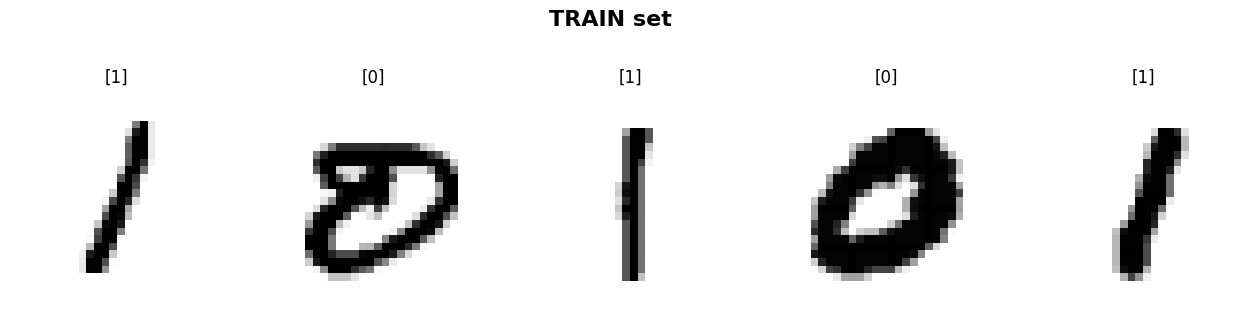

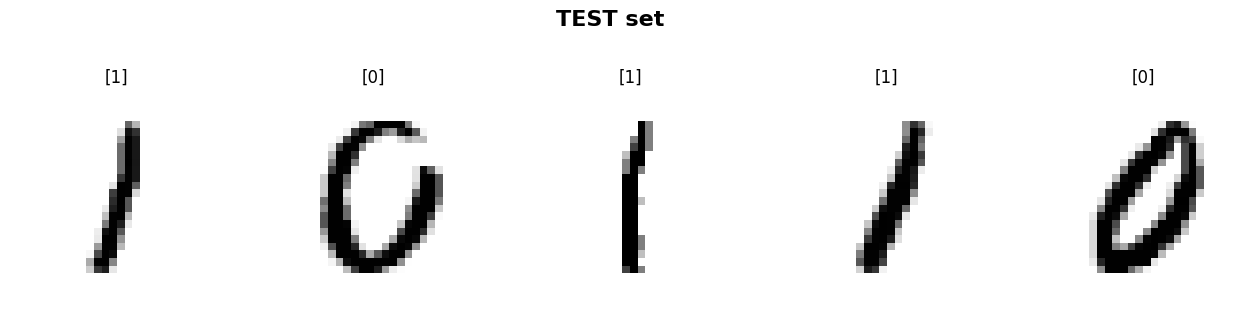

In [39]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

X_train = np.load('MNIST/X_train.npy')
X_test = np.load('MNIST/X_test.npy')
y_train = np.load('MNIST/Y_train.npy')
y_test = np.load('MNIST/Y_test.npy')


fig_train, ax_train = plt.subplots(figsize=(16, 8), nrows=1, ncols=5)
fig_train.suptitle("TRAIN set", y=0.73, fontsize=16, fontweight='bold')

fig_test, ax_test = plt.subplots(figsize=(16, 8), nrows=1, ncols=5)
fig_test.suptitle("TEST set", y=0.73, fontsize=16, fontweight='bold')

for idx in range(5):
    i, j = np.random.randint(X_train.shape[0]), np.random.randint(X_test.shape[0])
    
    ax_train[idx].imshow(X_train[i].reshape(28, 28), cmap = matplotlib.cm.binary)
    ax_train[idx].set_title(str(y_train[i]))
    ax_train[idx].axis('off')
    
    ax_test[idx].imshow(X_test[j].reshape(28, 28), cmap = matplotlib.cm.binary)
    ax_test[idx].set_title(str(y_test[j]))
    ax_test[idx].axis('off')

**Model**

The neural network has three dense layers with ReLU activation functions in the hidden layers and the sigmoid activation function in the last layer.

- The inputs are the pixel values from the digit images. Since the images have a size of 28 x 28 pixels, this results in 784 inputs.
- The neural network has 25 neurons in layer 1, 15 neurons in layer 2, and 1 neuron in layer 3.

The dimensions of the parameters of the dense layer network are determined as follows:

If the network has $n$ neurons in one layer and $m$ neurons in the next layer, then the weights $W$ will have the dimension $(n, m)$, and the bias $b$ will be a vector with $m$ elements.

Thus, the dimensions of the matrices $W$ and vectors $b$ are:

- **Layer 1**: The dimension of $W_1$ is (784, 25), and the dimension of $b_1$ is (1, 25).
- **Layer 2**: The dimension of $W_2$ is (25, 15), and the dimension of $b_2$ is (1, 15).
- **Layer 3**: The dimension of $W_3$ is (15, 1), and the dimension of $b_3$ is (1, 1).

For a training example, each neuron calculates the dot product between the input vector and a column from the weight vector, after which it applies the activation function.

<p align="center">
  <img src="imgs/mlp_architecture.png" alt="image" width="400" title="Neuron"/>
</p> 
<p align="center"><em>Figure 4. Neural network. </em></p>

**Parameter Initialization**

1. The bias (b) is usually initialized with 0 or a small constant value, for example 0.01.


2. The weights can be initialized with random numbers drawn from a Gaussian distribution.

$$
w \sim \mathcal{N}\left(0, 1 \right)
$$

This assumes that the neurons in all layers will work well with values drawn from the same distribution, regardless of their size. In practice, this can cause problems for the following reasons:

- Weights too small: The gradients shrink as they propagate through the layers, eventually becoming so small that the network stops learning. This phenomenon is known as the vanishing gradients problem.

- Weights too large: The gradients grow uncontrollably as they propagate through the layers, leading to the exploding gradients problem.

A solution to this problem is He initialization [1], which is used especially in the context of using the ReLU activation function. Thus, the weights are drawn from a normal distribution with the variance scaled by the number of inputs to the neuron $n_{in}$.

$$
w' \sim \mathcal{N}\left(0, \frac{2}{n_{\text{in}}}\right)
$$

In practice, the implementation involves multiplying the values drawn from the Gaussian distribution $\mathcal{N}\left(0, 1 \right)$ by the scaling factor as follows:

$$
w' = w \times \sqrt{\frac{2}{n_{in}}}
$$

[1] He, Kaiming, et al. "Delving deep into rectifiers: Surpassing human-level performance on imagenet classification." Proceedings of the IEEE international conference on computer vision. 2015.

**Ex1. Implement a 3-layer neural network.** Implement the forward propagation algorithm for the model presented in Figure 4 and use He initialization for the weights $(W_1, W_2, W_3)$ and zero initialization for the biases $(b_1, b_2, b_3)$. For a single training example, run the forward propagation and display the dimensions of the output vectors, weights, and biases after each layer.
$$
\begin{aligned}
z_1 &= X \cdot W_1 + b_1, \quad a_1 = \text{ReLU}(z_1) \\
z_2 &= a_1 \cdot W_2 + b_2, \quad a_2 = \text{ReLU}(z_2) \\
z_3 &= a_2 \cdot W_3 + b_3, \quad a_3 = \text{Sigmoid}(z_3)
\end{aligned}
$$

> Make a general implementation that can also be used for an X with more training examples. <br>
> Vectorize the multiplication operations. <br>
> To generate values from a Gaussian distribution, see the `np.random` module.

In [40]:
input_size = 28 * 28
hidden_size1 = 25
hidden_size2 = 15
output_size = 1

W1 = np.random.normal(loc=0, scale=np.sqrt(2.0 / input_size), size=(input_size, hidden_size1))
W2 = np.random.normal(loc=0, scale=np.sqrt(2.0 / hidden_size1), size=(hidden_size1, hidden_size2))
W3 = np.random.normal(loc=0, scale=np.sqrt(2.0 / hidden_size2), size=(hidden_size2, 1))

b1 = np.zeros(hidden_size1)
b2 = np.zeros(hidden_size2)
b3 = np.zeros(1)

params = {
    "W1": W1, "b1": b1,
    "W2": W2, "b2": b2,
    "W3": W3, "b3": b3
}

# Activation functions
def sigmoid(x):
    """
    Computes the sigmoid activation function.

    Parameters:
    - x: Input array or scalar (can be a numpy array, list, or single numeric value).

    Returns:
    - result: The sigmoid of the input, element-wise if `x` is an array (same shape as `x`).
    """
    # return (lambda val: 1 / (1 + np.exp(-val)))(x)
    # return np.array([1 / (1 + np.exp(-val)) for val in x])
    return 1 / (1 + np.exp(-x))

def relu(x):
    """
    Computes the ReLU (Rectified Linear Unit) activation function.

    Parameters:
    - x: Input array or scalar (can be a numpy array, list, or single numeric value).

    Returns:
    - result: The ReLU of the input, element-wise if `x` is an array (same shape as `x`).
    """
    # return (lambda val: max(0, val))(x)
    # return np.array([max(0, val) for val in x])
    return np.maximum(0, x)

def forward(X, params):
    """
    Performs the forward pass of the neural network.

    Parameters:
    - X: Input data (shape: (m, input_size)).
    - params: Dictionary containing weights and biases.

    Returns:
    - activations: Dictionary containing intermediate and final outputs.
    """
    W1, b1 = params["W1"], params["b1"]
    W2, b2 = params["W2"], params["b2"]
    W3, b3 = params["W3"], params["b3"]

    z1 = np.dot(X, W1) + b1
    a1 = relu(z1)

    z2 = np.dot(a1, W2) + b2
    a2 = relu(z2)

    z3 = np.dot(a2, W3) + b3
    a3 = sigmoid(z3)

    activations = {
        "z1": z1, "a1": a1,
        "z2": z2, "a2": a2,
        "z3": z3, "a3": a3
    }

    return activations

**Ex2. Implement the binary cross-entropy loss function.**

$$
\text{BCELoss} = -\frac{1}{M} \sum_{i=1}^{M} \left( y_i \times \log(\hat{y}_i) + (1 - y_i) \times \log(1 - \hat{y}_i) \right)
$$

- where M represents the number of examples
- $y_i$ is the real label (0 or 1)
- $\hat y_i$ is the probability predicted by the model for the positive class (1).

In [41]:
def binary_cross_entropy(y_true, y_pred):
    """
    Computes the binary cross-entropy loss for a batch of predictions.

    Parameters:
    - y_true: Ground truth labels (shape: (m, 1) or (m,), where m is the batch size). 
              Values should be binary (0 or 1).
    - y_pred: Predicted probabilities (shape: (m, 1) or (m,)). 
              Values should be in the range [0, 1], representing the model's confidence (probability)
              in predicting the positive class.

    Returns:
    - loss: The average binary cross-entropy loss for the batch (scalar value).
    """
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    
    M = y_true.shape[0]
    
    loss = -1 / M * np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    
    return loss

**Ex3. Calculate the gradient of the BCELoss loss function with respect to $\hat{y}$.** The gradient $\nabla_\hat{y} \text{BCELoss}$ will be a vector containing the partial derivatives of the loss function with respect to each $\hat{y}_i$, namely $[\frac{\partial \text{BCELoss}}{\partial \hat{y}_0}, \frac{\partial \text{BCELoss}}{\partial \hat{y}_1}, ...]$ 
Both y and $\hat{y}$ are vectors. The gradient $\nabla_\hat{y} \text{BCELoss}$ has the same dimension as $\hat{y}$.

In [42]:
def BCE_loss_derivative(y_true, y_pred):
    """
    Computes the derivative of the binary cross-entropy (BCE) loss 
    with respect to the predictions.

    Parameters:
    - y_true: Ground truth labels (shape: (m, 1) or (m,), where m is the batch size).
              Values should be binary (0 or 1).
    - y_pred: Predicted probabilities (shape: (m, 1) or (m,)).
              Values should be in the range [0, 1], representing the model's confidence
              in predicting the positive class.

    Returns:
    - gradient: The derivative of the binary cross-entropy loss with respect to 
                the predictions (y_pred). This has the same shape as `y_pred`.
    """
    m = y_true.shape[0]
    gradient = -(y_true / y_pred) + ((1 - y_true) / (1 - y_pred))
    return gradient / m

In [43]:
### RUN TESTS

test_cases = [
    {"y_hat": np.array([0.8, 0.1, 0.5]), "y": np.array([1, 0, 1]), "expected_derivative": np.array([-0.41666667, 0.37037037, -0.66666667])},
    {"y_hat": np.array([[0.4], [0.8], [0.2]]), "y": np.array([[0], [1], [0]]), "expected_derivative": np.array([[0.55555556],[-0.41666667],[ 0.41666667]])}]

for i, case in enumerate(test_cases, start=1):
    y_hat = case["y_hat"]
    y = case["y"]
    expected_derivative = case["expected_derivative"]
    
    computed_derivative = BCE_loss_derivative(y, y_hat)

    matched = np.allclose(computed_derivative, expected_derivative, atol=1e-4)
    
    print(f"Test case: {i}")
    print("Test:", "PASS" if matched else "FAIL")
    
    if not matched:
        print(f"Expected Derivative: {expected_derivative}")
        print(f"Computed Derivative: {computed_derivative}")

Test case: 1
Test: PASS
Test case: 2
Test: PASS


**Ex4. Calculate the derivative of the sigmoid function $\sigma(x)$ with respect to an input x.**

$$ \sigma'(x) = \sigma(x) \times (1 - \sigma(x))
$$

In [44]:
def sigmoid_derivative(x):
    """
    Computes the derivative of the sigmoid function.

    Parameters:
    - x: Input array or scalar (can be a numpy array, list, or single numeric value).
         Represents the input to the sigmoid function.

    Returns:
    - result: The derivative of the sigmoid function, element-wise if `x` is an array.
              It has the same shape as `x`.
    """
    # return np.dot(sigmoid(x), 1 - sigmoid(x))
    return sigmoid(x) * (1 - sigmoid(x))

Next, we will calculate the gradient of the loss function with respect to each parameter of the model using the backpropagation method.

**Simple example of backpropagation.**

<p align="center">
  <img src="imgs/computational_graph.png" alt="image" width="800"/>
</p> 


For the MLP model, we will start by calculating the derivative of the loss function with respect to $a_3$ (the predicted probability also denoted by $\hat{y}$), after which we will use the chain rule and backpropagation to calculate all the derivatives:

$$
\frac{\partial L}{\partial w_{i,k}} = \frac{\partial L}{\partial \hat{y}_i} \cdot \frac{\partial \hat{y}_i}{\partial w_{i,k}}
$$

**Ex5. Calculate the gradient of the BCE Loss function for the last layer of the model** for a batch of X examples of size (m, input_size). We will calculate $\frac{\partial L}{\partial W_3}$ and $\frac{\partial L}{\partial b_3}$.


In backpropagation, we encounter 2 types of multiplications:
- if in forward propagation we have a **linear transformation**, i.e., a matrix multiplication or a dot product $z = x \cdot W + b$, then in backpropagation we also use a dot product or matrix multiplication to propagate the gradients.

The gradient of W is calculated with the chain rule as follows:

$$
\frac{\partial \text{L}}{\partial W} = x^T \cdot \frac{\partial \text{L}}{\partial z}
$$

where $\frac{\partial \text{L}}{\partial z}$ represents the gradient coming from the previous layer, i.e., from "upstream", and the gradient of x is calculated as:

$$
\frac{\partial \text{L}}{\partial x} = \frac{\partial \text{L}}{\partial z} \cdot W^T 
$$

- if in forward propagation we have an operation that is applied **element-wise** to a matrix or a vector (such as ReLU, Sigmoid, multiplication by a scalar), then we will use element-wise multiplication in backpropagation.


For the last layer that applies a linear transformation $z_3 = a_2 \cdot W_3 + b_3$, where the dimensions are $a_2(m,p)$, $W_3(p,1)$, $b_3(1, 1)$, $z_3(m, 1)$, $a_3(m, 1)$, and m is the number of examples in the batch, the chain rule is applied as follows:

**Forward propagation $\rightarrow$**:

$$
z_3 = a_2 \cdot W_3 + b_3
$$

$$
a_3 = \text{Sigmoid}(z_3)
$$

**Backpropagation $\leftarrow$**:

$$
\frac{\partial \text{BCELoss}}{\partial z_3} = \frac{\partial \text{BCELoss}}{\partial a_3} \times \frac{\partial a_3}{\partial z_3} \text{(element-wise multiplication)}
$$

$$
\frac{\partial \text{BCELoss}}{\partial W_3} = \frac{1}{m}a_2^T \cdot \frac{\partial \text{BCELoss}}{\partial z_3}  \text{(matrix multiplication)}
$$

$$
\frac{\partial \text{BCELoss}}{\partial b_3} = \frac{1}{m}\sum_{i=0}^{m-1} \frac{\partial  \text{BCELoss}}{\partial z_3^i} \text{(mean over columns)}
$$ 

> *Hint*: Call the propagation function for the batch of input examples only once. <br>
> The dimension of the gradient with respect to a parameter is always equal to the dimension of the parameter <br>
> $a_3$ actually represents $\hat{y}$ used in the `BCELoss` calculation

In [45]:
from typing import Dict, Tuple

def backward_third_layer(y: np.ndarray, activations: Dict[str, np.ndarray]) -> Tuple[np.ndarray, np.ndarray]:
    """
    Computes vectorized gradients of the last layer for backpropagation over a batch.

    Parameters:
    - y (np.ndarray): True labels for the batch, shape (m, 1).
                      `m` is the number of examples
    - activations (Dict[str, np.ndarray]): Dictionary containing activations and pre-activations of the network.

    Returns:
    --------
    Tuple[np.ndarray, np.ndarray, np.ndarray]
        Gradients computed for the last layer:
        - dz3 : Gradient of the loss w.r.t. the pre-activation (z3), shape (m, 1).
        - dW3  : Gradient of the loss w.r.t. the weights (W3), shape (p, 1).
        - db3  : Gradient of the loss w.r.t. the biases (b3), shape (1, 1).

    """
    a3 = activations["a3"]
    z3 = activations["z3"]
    a2 = activations["a2"]

    m = y.shape[0]

    dL_da3 = BCE_loss_derivative(y, a3)
    da3_dz3 = sigmoid_derivative(z3)
    
    dz3 = dL_da3 * da3_dz3

    dW3 = (1 / m) * np.dot(a2.T, dz3)

    db3 = (1 / m) * np.sum(dz3, axis=0, keepdims=True)

    return dz3, dW3, db3


def forward_backward_third_layer(X: np.ndarray, 
                                y: np.ndarray, 
                                params: Dict[str, np.ndarray]) -> Tuple[np.ndarray, np.ndarray]:
    """
     Performs a full forward pass for the entire network to compute the intermediate activations 
    and backward pass for the last layer for a single example.

    Parameters:
    - X (np.ndarray): Input features for the batch, shape (m, p).
                      `m` is the number of examples, `p` is the number of features.
    - y (np.ndarray): True labels for the batch, shape (m, 1).
                      `m` is the number of examples
    - params (Dict[str, np.ndarray]): Dictionary containing model parameters (e.g., W3, b3).

    Returns:
    - Tuple[np.ndarray, np.ndarray]: Gradients (dz3, dW3, db3)
    """
    activations = forward(X, params)
    
    dz3, dW3, db3 = backward_third_layer(y, activations)
    
    return dz3, dW3, db3

In [46]:
### RUN TESTS

def test_backward(forward_backward_func, params, X_batch, y_batch, expected_dW, expected_db):
     
    # Run forward and backward pass
    W1, b1 = params["W1"], params["b1"]
    W2, b2 = params["W2"], params["b2"]
    W3, b3 = params["W3"], params["b3"]
    _, dW, db = forward_backward_func(X_batch, y_batch, params)
      
    dW_pass = np.allclose(dW, expected_dW, atol=1e-4)
    db_pass = np.allclose(db, expected_db, atol=1e-4)
    
    print("Test Results:")
    print("dW Test:", "PASS" if dW_pass else "FAIL")
    print("db Test:", "PASS" if db_pass else "FAIL")
    
    if not dW_pass:
        print("\nMismatch in dW:")
        print("Computed dW:")
        print(dW)
        print("Expected dW:")
        print(expected_dW)
    
    if not db_pass:
        print("\nMismatch in db:")
        print("Computed db:")
        print(db)
        print("Expected db:")
        print(expected_db)

In [47]:
### RUN TESTS

W1 = np.array([[0.1, -0.05, 0.02],
               [0.03, 0.07, -0.02]])
b1 = np.array([[0.01, 0.02, -0.03]])
W2 = np.array([[0.1, -0.1],
               [0.05, 0.02],
               [-0.03, 0.06]])
b2 = np.array([[0.03, -0.02]])

W3 = np.array([[5.0], [-3.0]])  
b3 = np.array([[0.5]])          

params = {
    "W1": W1, "b1": b1,
    "W2": W2, "b2": b2,
    "W3": W3, "b3": b3
}

X_t = np.array([[1.5, -0.3], [0.7, 2.2]])  
y_t = np.array([[1], [0]]) 

expected_dW3 = np.array([[0.00510939],[0.]])
expected_db3 = np.array([[0.08862105]])

test_backward(forward_backward_third_layer, params, X_t, y_t, expected_dW3, expected_db3)

Test Results:
dW Test: PASS
db Test: PASS


**Ex6. Calculate the gradient of the loss function for the second layer of the model for a batch of examples.** To calculate $\frac{\partial L}{\partial W_2}$ and $\frac{\partial L}{\partial b_2}$, use the gradients calculated so far and backpropagation.

**Forward propagation $\rightarrow$:**
$$
z_2 = a_1 \cdot W_2 + b_2
$$

$$
a_2 = \text{ReLU}(z_2)
$$

$$
z_3 = a_2 \cdot W_3 + b_3
$$

**Backpropagation $\leftarrow$:**

$$
\frac{\partial \text{BCELoss}}{\partial a_2} = \frac{\partial \text{BCELoss}}{\partial z_3} \cdot W_3^T
$$

$$
\frac{\partial \text{BCELoss}}{\partial z_2} = \frac{\partial \text{BCELoss}}{\partial a_2} \times ReLU'(z_2)
$$

where 

$$
\text{ReLU'}(x) =
\begin{cases} 
1, & \text{if } x > 0 \\
0, & \text{if } x \leq 0
\end{cases}
$$

$$
\frac{\partial \text{BCELoss}}{\partial W_2} = \frac{1}{m}a_1^T \cdot \frac{\partial \text{BCELoss}}{\partial z_2}  \text{(matrix multiplication)}
$$

$$
\frac{\partial \text{BCELoss}}{\partial b_2} = \frac{1}{m}\sum_{i=0}^{m-1} \frac{\partial \text{BCELoss}}{\partial z_2^i} \text{(mean over columns)}
$$ 

> *Hint*: Reuse the `backward_third_layer` function to calculate $\frac{\text{BCELoss}}{\partial z_3}$.

In [48]:
def relu_derivative(x):
    return (x > 0).astype(float)

def backward_second_layer(y: np.ndarray, 
                          params: Dict[str, np.ndarray], 
                          activations: Dict[str, np.ndarray]) -> Tuple[np.ndarray, np.ndarray]:
    """
    Computes vectorized gradients of the second layer for backpropagation over a batch.

    Parameters:
    - y (np.ndarray): True labels for the batch, shape (m, 1).
                      `m` is the number of examples
    - params (Dict[str, np.ndarray]): Dictionary containing model parameters (e.g., W2, b2, W3, b3).
    - activations (Dict[str, np.ndarray]): Dictionary containing activations and pre-activations of the network.

    Returns:
    Tuple[np.ndarray, np.ndarray, np.ndarray]
        Gradients computed for the last layer:
        - dz2 : Gradient of the loss w.r.t. the pre-activation (z2)
        - dW2  : Gradient of the loss w.r.t. the weights (W2)
        - db2  : Gradient of the loss w.r.t. the biases (b2)

    """
    W3 = params["W3"]
    z2 = activations["z2"]
    a1 = activations["a1"]
    m = y.shape[0]

    a3 = activations["a3"]
    z3 = activations["z3"]
    dL_da3 = BCE_loss_derivative(y, a3)
    da3_dz3 = sigmoid_derivative(z3)
    dz3 = dL_da3 * da3_dz3

    dz2 = np.dot(dz3, W3.T) * relu_derivative(z2)
    dW2 = (1 / m) * np.dot(a1.T, dz2)
    db2 = (1 / m) * np.sum(dz2, axis=0, keepdims=True)

    return dz2, dW2, db2

def forward_backward_second_layer(X: np.ndarray, 
                                  y: np.ndarray, 
                                  params: Dict[str, np.ndarray]) -> Tuple[np.ndarray, np.ndarray]:
    """
    Performs a full forward pass for the entire network to compute the intermediate activations 
    and backward pass for the second layer using vectorized operations.

    Parameters:
    - X (np.ndarray): Input features for the batch, shape (m, n).
                      `m` is the number of examples, `n` is the number of features.
    - y (np.ndarray): True labels for the batch, shape (m, 1).
                      `m` is the number of examples
    - params (Dict[str, np.ndarray]): Dictionary containing model parameters (e.g., W2, b2, W3, b3).

    Returns:
    - Tuple[np.ndarray, np.ndarray]: Gradients (dz2, dW2, db2)
    """
    activations = forward(X, params)
    dz2, dW2, db2 = backward_second_layer(y, params, activations)
    return dz2, dW2, db2

In [49]:
### RUN TESTS

W1 = np.array([[0.1, -0.05, 0.02],
               [0.03, 0.07, -0.02]])
b1 = np.array([[0.01, 0.02, -0.03]])
W2 = np.array([[0.1, 0.1],
               [4.0, 2.0],
               [-0.03, 0.06]])
b2 = np.array([[0.03, -0.02]])

W3 = np.array([[5.0], [-3.0]])  
b3 = np.array([[0.5]])          

params = {
    "W1": W1, "b1": b1,
    "W2": W2, "b2": b2,
    "W3": W3, "b3": b3
}

X_t = np.array([[1.5, -0.3], [0.7, 2.2]])  
y_t = np.array([[1], [0]]) 

expected_dW2 = np.array([[ 0.10924257, -0.10250817],[ 0.16265566, -0.09759339], [-0.00244786, 0]])
expected_db2 = np.array([[0.76220853, -0.70211075]])

test_backward(forward_backward_second_layer, params, X_t, y_t, expected_dW2, expected_db2)

Test Results:
dW Test: PASS
db Test: PASS


**Ex7. Calculate the gradient of the loss function for the first layer of the model for a batch of examples.** To calculate $\frac{\partial L}{\partial W_1}$ and $\frac{\partial L}{\partial b_1}$, use the gradients calculated so far and backpropagation.


**Forward propagation $\rightarrow$**
$$
z_1 = X \cdot W_1 + b_1
$$

$$
a_1 = \text{ReLU}(z_1)
$$

$$
z_2 = a_1 \cdot W_2 + b_2
$$


**Backpropagation $\leftarrow$**

$$
\frac{\partial \text{BCELoss}}{\partial a_1} = \frac{\partial \text{BCELoss}}{\partial z_2} \cdot W_2^T
$$

$$
\frac{\partial \text{BCELoss}}{\partial z_1} = \frac{\partial \text{BCELoss}}{\partial a_1} \times ReLU'(z_1)
$$

$$
\frac{\partial \text{BCELoss}}{\partial W_1} = \frac{1}{m}X^T \cdot \frac{\partial \text{BCELoss}}{\partial z_1}
$$

$$
\frac{\partial \text{BCELoss}}{\partial b_1} = \frac{1}{m}\sum_{i=0}^{m-1} \frac{\partial \text{BCELoss}}{\partial z_1^i}
$$ 

> *Hint*: Reuse the `backward_second_layer` function to calculate $\frac{\text{BCELoss}}{\partial z_2}$

In [50]:
def backward_first_layer(X: np.ndarray, 
                                          y: np.ndarray, 
                                          params: Dict[str, np.ndarray], 
                                          activations: Dict[str, np.ndarray]) -> Tuple[np.ndarray, np.ndarray]:
    """
    Computes vectorized gradients of the first layer for backpropagation over a batch.

    Parameters:
    - X (np.ndarray): Input features for the batch, shape (m, n).
                      `m` is the number of examples, `n` is the number of input features.
    - y (np.ndarray): True labels for the batch, shape (m, 1).
                      `m` is the number of examples
    - params (Dict[str, np.ndarray]): Dictionary containing model parameters (e.g., W1, b1, W2, b2, W3, b3).
    - activations (Dict[str, np.ndarray]): Dictionary containing activations and pre-activations of the network.

    Returns:
    Tuple[np.ndarray, np.ndarray, np.ndarray]
        Gradients computed for the last layer:
        - dz1 : Gradient of the loss w.r.t. the pre-activation (z1)
        - dW1  : Gradient of the loss w.r.t. the weights (W1)
        - db1  : Gradient of the loss w.r.t. the biases (b1)
    """
    W2 = params["W2"]
    W3 = params["W3"]
    z1 = activations["z1"]
    z2 = activations["z2"]
    z3 = activations["z3"]
    a3 = activations["a3"]

    m = X.shape[0]

    dz3 = BCE_loss_derivative(y, a3) * sigmoid_derivative(z3)
    dz2 = np.dot(dz3, W3.T) * relu_derivative(z2)
    dz1 = np.dot(dz2, W2.T) * relu_derivative(z1)

    dW1 = (1 / m) * np.dot(X.T, dz1)
    db1 = (1 / m) * np.sum(dz1, axis=0, keepdims=True)

    return dz1, dW1, db1

def forward_backward_first_layer(X: np.ndarray, 
                        y: np.ndarray, 
                        params: Dict[str, np.ndarray]) -> Tuple[np.ndarray, np.ndarray]:
    """
    Performs a full forward pass for the entire network to compute the intermediate activations 
    and backward pass for the first layer using vectorized operations.

    Parameters:
    - X (np.ndarray): Input features for the batch, shape (m, n).
                      `m` is the number of examples, `n` is the number of input features.
    - y (np.ndarray): True labels for the batch, shape (m, 1).
                      `m` is the number of examples
    - params (Dict[str, np.ndarray]): Dictionary containing model parameters (e.g., W1, b1, W2, b2, W3, b3).

    Returns:
    - Tuple[np.ndarray, np.ndarray]: Gradients (dW1, db1) for the first layer weights and biases.
    """
    activations = forward(X, params)

    dz1, dW1, db1 = backward_first_layer(X, y, params, activations)
    
    return dz1, dW1, db1

In [51]:
### RUN TESTS

W1 = np.array([[0.1, -0.05, 0.2],
               [0.3, 0.7, -0.02]])
b1 = np.array([[0.1, 0.2, -0.3]])
W2 = np.array([[0.1, 0.1],
               [4.0, 2.0],
               [-0.03, 0.06]])
b2 = np.array([[0.03, -0.02]])

W3 = np.array([[5.0], [-3.0]])  
b3 = np.array([[0.5]])          

params = {
    "W1": W1, "b1": b1,
    "W2": W2, "b2": b2,
    "W3": W3, "b3": b3
}

X_t = np.array([[1.5, -0.3], [0.7, 2.2]])  
y_t = np.array([[1], [0]]) 

expected_dW1 = np.array([[-2.60110482e-02, 2.45, 1.83033145e-02],
 [ 1.22202210e-01, 7.7, -3.66066289e-03]])
expected_db1 = np.array([[ 0.00932597, 3.5, 0.01220221]])

test_backward(forward_backward_first_layer, params, X_t, y_t, expected_dW1, expected_db1)

Test Results:
dW Test: PASS
db Test: PASS


**Ex8. Implement the `backward` function that calculates the gradients of the loss function with respect to all model parameters ($W_1, W_2, W_3, b_1, b_2, b_3$) and updates each parameter individually with gradient descent**:

$$
\theta \leftarrow \theta - \alpha \nabla_{\theta} \text{BCELoss}
$$

- where $\alpha$ is the learning rate
- $\theta$ represents each parameter of the model ($W_1, W_2, W_3, b_1, b_2, b_3$)

In [52]:

def backward(X: np.ndarray, 
             y: np.ndarray, 
             params: Dict[str, np.ndarray], 
             activations: Dict[str, np.ndarray], 
             learning_rate: float = 0.001) -> Dict[str, np.ndarray]:
    """
    Performs the backward pass of the neural network and updates the parameters using gradient descent.

    Parameters:
    - X (np.ndarray): Input features for the batch, shape (m, n).
                      `m` is the number of examples, `n` is the number of input features.
    - y (np.ndarray): True labels for the batch, shape (m, 1).
                      `m` is the number of examples
    - params (Dict[str, np.ndarray]): Dictionary containing model parameters (e.g., W1, b1, W2, b2, W3, b3).
    - activations (Dict[str, np.ndarray]): Dictionary containing activations and pre-activations of the network.
    - learning_rate (float, optional): Learning rate for gradient descent. Default is 0.001.

    Returns:
    - Dict[str, np.ndarray]: Updated model parameters after gradient descent.
    """
    m = X.shape[0]

    dz3, dW3, db3 = backward_third_layer(y, activations)

    dz2 = np.dot(dz3, params["W3"].T) * relu_derivative(activations["z2"])
    dW2 = (1 / m) * np.dot(activations["a1"].T, dz2)
    db2 = (1 / m) * np.sum(dz2, axis=0, keepdims=True)

    dz1 = np.dot(dz2, params["W2"].T) * relu_derivative(activations["z1"])
    dW1 = (1 / m) * np.dot(X.T, dz1)
    db1 = (1 / m) * np.sum(dz1, axis=0, keepdims=True)

    params["W3"] -= learning_rate * dW3
    params["b3"] -= learning_rate * db3.flatten()

    params["W2"] -= learning_rate * dW2
    params["b2"] -= learning_rate * db2.flatten()

    params["W1"] -= learning_rate * dW1
    params["b1"] -= learning_rate * db1.flatten()

    return params

**Ex9. Implement the training function.** The $X_{train}$ dataset will be iterated for a fixed number of epochs. In one epoch, all examples from the training set are visited. Mini-batch gradient descent will be used, where only one batch of examples from the entire training set will be propagated forward at a time. Display the value of the loss function at each epoch. Display the graph of the loss function.

### Pseudocode

**Input**: 
- `X_train` (training data), `y_train` (training labels)

**Hyperparameters**:
- `num_epochs` (number of epochs)
-  `batch_size` (mini-batch size)
- `learning_rate` (learning rate)

**Output**: 
- Prints average loss per epoch

**Initialize Parameters**:
   ```plaintext
   num_epochs ← 30
   batch_size ← 64  # Mini-batch size
   learning_rate ← 0.1
   num_batches ← floor(X_train.shape[0] / batch_size)  # Number of batches per epoch
```

**Training Loop**:
```plaintext
FOR epoch IN range(1, num_epochs + 1):
    # Shuffle the data at the start of each epoch
    indices ← generate shuffled indices for X_train
    X_train ← reorder X_train using indices
    y_train ← reorder y_train using indices

    epoch_loss ← 0  # Initialize epoch loss

    # Loop over mini-batches
    FOR i IN range(num_batches):
        start ← i * batch_size
        end ← start + batch_size
        
        # Get the mini-batch
        X_batch ← X_train[start:end]
        y_batch ← y_train[start:end]
        
        # Forward pass
        output ← forward(X_batch)
        
        # Compute loss
        loss ← binary_cross_entropy(y_batch, output)
        epoch_loss ← epoch_loss + loss
        
        # Backward pass
        backward(X_batch, y_batch, output, learning_rate)

    # Compute average loss for the epoch
    avg_epoch_loss ← epoch_loss / num_batches
```

Epoch 1/30 - Loss: 0.5425
Epoch 2/30 - Loss: 0.3692
Epoch 3/30 - Loss: 0.2496
Epoch 4/30 - Loss: 0.1624
Epoch 5/30 - Loss: 0.1085
Epoch 6/30 - Loss: 0.0777
Epoch 7/30 - Loss: 0.0594
Epoch 8/30 - Loss: 0.0476
Epoch 9/30 - Loss: 0.0400
Epoch 10/30 - Loss: 0.0344
Epoch 11/30 - Loss: 0.0303
Epoch 12/30 - Loss: 0.0271
Epoch 13/30 - Loss: 0.0246
Epoch 14/30 - Loss: 0.0225
Epoch 15/30 - Loss: 0.0209
Epoch 16/30 - Loss: 0.0195
Epoch 17/30 - Loss: 0.0183
Epoch 18/30 - Loss: 0.0173
Epoch 19/30 - Loss: 0.0164
Epoch 20/30 - Loss: 0.0156
Epoch 21/30 - Loss: 0.0149
Epoch 22/30 - Loss: 0.0143
Epoch 23/30 - Loss: 0.0137
Epoch 24/30 - Loss: 0.0133
Epoch 25/30 - Loss: 0.0128
Epoch 26/30 - Loss: 0.0122
Epoch 27/30 - Loss: 0.0116
Epoch 28/30 - Loss: 0.0117
Epoch 29/30 - Loss: 0.0113
Epoch 30/30 - Loss: 0.0111


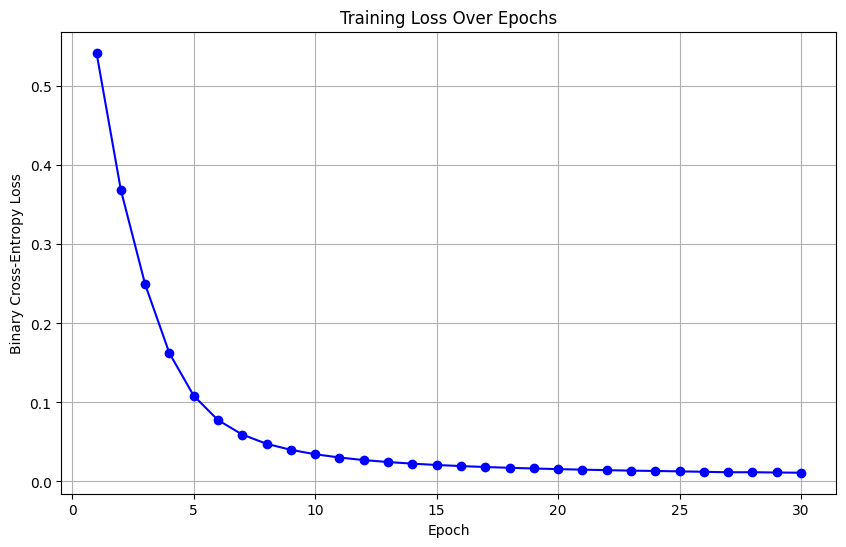

In [53]:
import matplotlib.pyplot as plt

# Initialize the parameters
input_size = 28 * 28
hidden_size1 = 25
hidden_size2 = 15
output_size = 1

params = {
    "W1": np.random.normal(loc=0, scale=np.sqrt(2.0 / input_size), size=(input_size, hidden_size1)),
    "b1": np.zeros(hidden_size1),
    "W2": np.random.normal(loc=0, scale=np.sqrt(2.0 / hidden_size1), size=(hidden_size1, hidden_size2)),
    "b2": np.zeros(hidden_size2),
    "W3": np.random.normal(loc=0, scale=np.sqrt(2.0 / hidden_size2), size=(hidden_size2, 1)),
    "b3": np.zeros(1)
}

# Training hyperparameters
num_epochs = 30
batch_size = 64
learning_rate = 0.1
loss_history = []

# Training loop
for epoch in range(1, num_epochs + 1):
    # Shuffle the data at the start of each epoch
    indices = np.random.permutation(X_train.shape[0])
    X_shuffled = X_train[indices]
    y_shuffled = y_train[indices]
    
    epoch_loss = 0
    num_batches = X_train.shape[0] // batch_size
    
    for i in range(num_batches):
        start = i * batch_size
        end = start + batch_size
        
        X_batch = X_shuffled[start:end]
        y_batch = y_shuffled[start:end]
        
        # Forward pass
        activations = forward(X_batch, params)
        predictions = activations["a3"]
        
        # Compute loss
        loss = binary_cross_entropy(y_batch, predictions)
        epoch_loss += loss
        
        # Backward pass & Update Parameters
        params = backward(X_batch, y_batch, params, activations, learning_rate)
        
    avg_loss = epoch_loss / num_batches
    loss_history.append(avg_loss)
    
    if epoch % 1 == 0:
        print(f"Epoch {epoch}/{num_epochs} - Loss: {avg_loss:.4f}")

# Display the graph of the loss function
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), loss_history, marker='o', color='b')
plt.title("Training Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Binary Cross-Entropy Loss")
plt.grid(True)
plt.show()

**Ex10. Implement the testing function.** Run the `forward` function on the images from the test set. To find the predicted class, the obtained probability is checked:

$$
\begin{cases}
\text{if } p(y=1|x; \theta) < 0.5 \text{ predict class 0} \\
\text{if } p(y=1|x; \theta) \geq 0.5 \text{ predict class 1}
\end{cases}
$$

The accuracy on the test set will also be calculated. Display some images from the test set and the predicted label.


$$
\text{Accuracy} = \frac{TP + TN}{TP + FP + FN + TN}
$$


> *Hint*:  $p(y=1|x; \theta)$ represents $a_3$

Test Accuracy: 99.86%


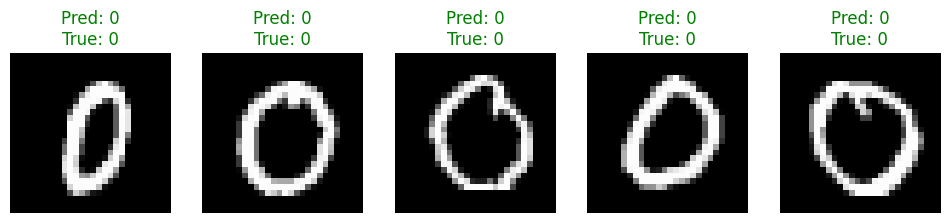

In [54]:
import matplotlib.pyplot as plt

def evaluate_model(X_test, y_test, params, num_images_to_show=5):
    # Forward pass on the test set
    activations = forward(X_test, params)
    probabilities = activations["a3"]
    
    # Convert probabilities to class labels (0 or 1)
    predictions = (probabilities >= 0.5).astype(int)
    
    # 3. Calculate Accuracy
    correct_predictions = np.sum(predictions == y_test)
    accuracy = correct_predictions / y_test.shape[0]
    
    print(f"Test Accuracy: {accuracy * 100:.2f}%")
    
    # Display sample images and their predicted labels
    plt.figure(figsize=(12, 4))
    for i in range(num_images_to_show):
        plt.subplot(1, num_images_to_show, i + 1)
        
        # Reshape the 784 flat vector back to 28*28 for display
        img = X_test[i].reshape(28, 28)
        plt.imshow(img, cmap='gray')
        
        title_color = 'green' if predictions[i] == y_test[i] else 'red'
        plt.title(f"Pred: {predictions[i][0]}\nTrue: {int(y_test[i][0])}", color=title_color)
        plt.axis('off')
    plt.show()

    return predictions, accuracy

predictions, test_acc = evaluate_model(X_test, y_test, params)

To better understand how neural networks work and how they learn from data, you can access the web application [playground.tensorflow.org](https://playground.tensorflow.org/) for an interactive visualization of them.